In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
names = ['Size', '#Threads', 'Runtime (s)', 'Energy (J)']
df = pd.read_csv('matmul.csv', names=names, usecols=[1, 2, 4, 6])

flop = df['Size'] * df['Size'] * (2 * df['Size'] - 1)
df['FLOP/s'] = flop / df['Runtime (s)']
df['FLOP/J'] = flop / df['Energy (J)']

df

,Size,#Threads,Runtime (s),Energy (J),FLOP/s,FLOP/J
0,300,1,0.031640,0.499215,1.703863e+09,1.079896e+08
1,300,2,0.016565,0.327160,3.254421e+09,1.647820e+08
2,300,3,0.011307,0.268931,4.767779e+09,2.004604e+08
3,300,4,0.008867,0.246309,6.079981e+09,2.188718e+08
4,300,5,0.007334,0.233064,7.351161e+09,2.313099e+08
...,...,...,...,...,...,...
155,1200,12,1.104830,45.021307,3.126780e+09,7.673167e+07
156,1200,13,0.954421,39.637040,3.619535e+09,8.715484e+07
157,1200,14,0.921017,38.690873,3.750812e+09,8.928617e+07
158,1200,15,0.912870,38.797902,3.784284e+09,8.903987e+07


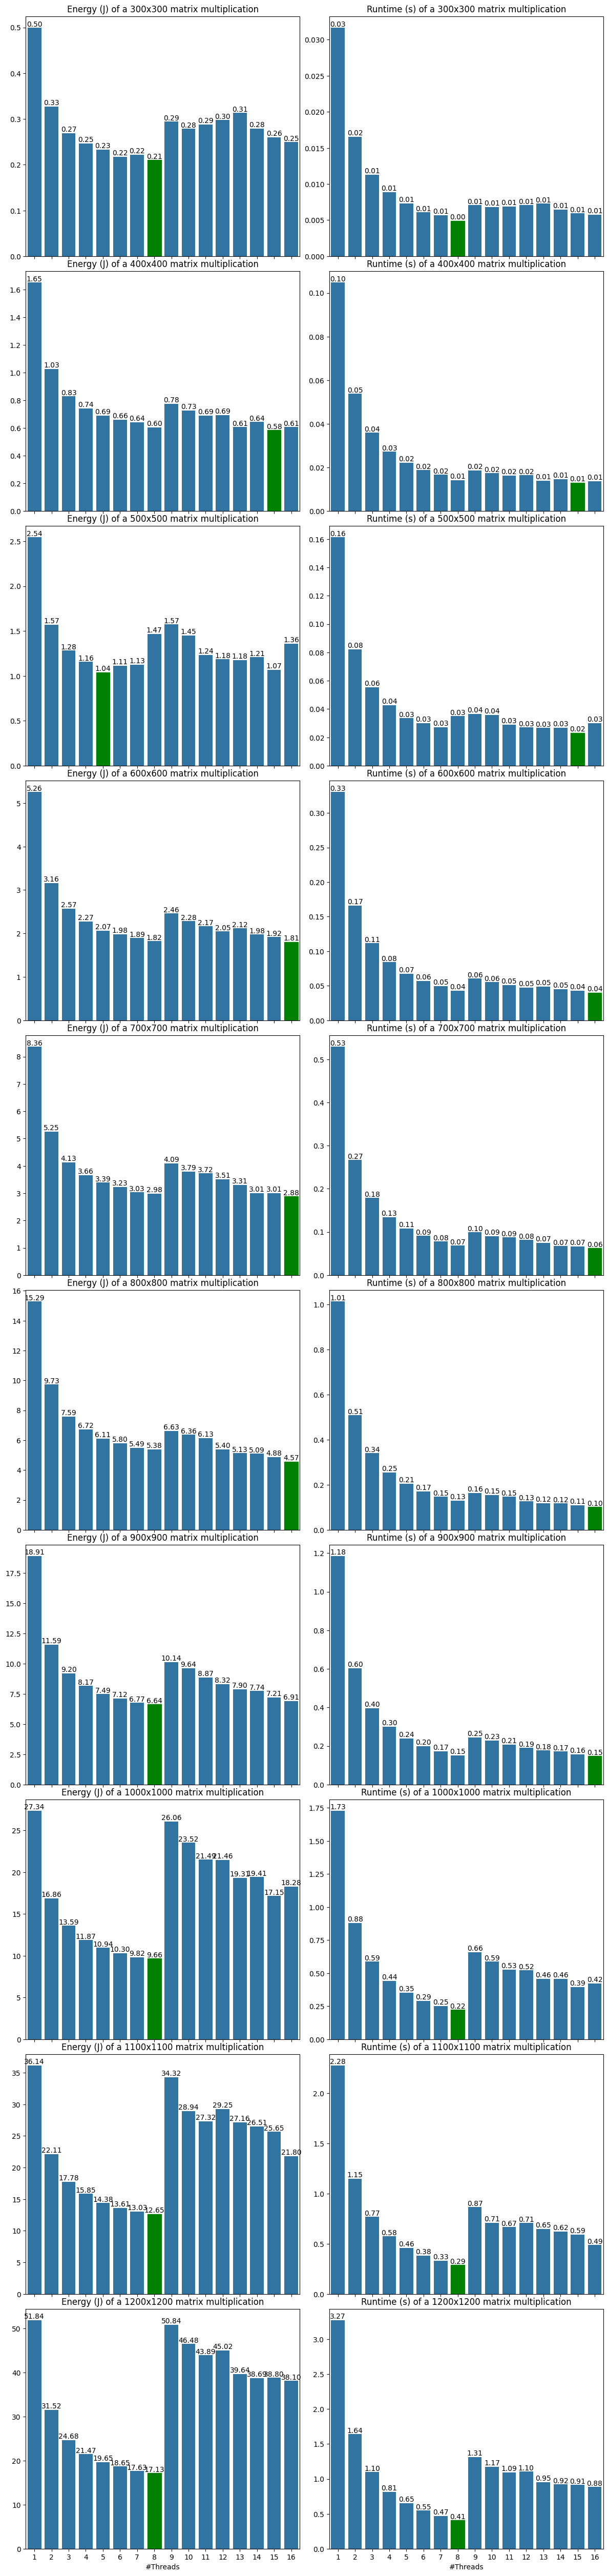

In [108]:
by_size = df.groupby('Size')

fig, axs = plt.subplots(len(by_size), 2, figsize=(12, 5 * len(by_size)), sharex=True)
fig.tight_layout()

for ((size, dfx), (ax_j, ax_s)) in zip(df.groupby('Size'), axs):
    sns.barplot(dfx, x='#Threads', y='Energy (J)', ax=ax_j)
    sns.barplot(dfx, x='#Threads', y='Runtime (s)', ax=ax_s)

    ax_j.set_title(f'Energy (J) of a {size}x{size} matrix multiplication')
    ax_s.set_title(f'Runtime (s) of a {size}x{size} matrix multiplication')
    ax_j.set_ylabel('')
    ax_s.set_ylabel('')
    
    def color_best(ax, col):
        ax.bar_label(ax.containers[0], fmt='%.2f')
        for bar in ax.patches:
            if bar.get_height() == dfx[col].min():
                bar.set_color('g')
                return
    color_best(ax_j, 'Energy (J)')
    color_best(ax_s, 'Runtime (s)')

plt.show()

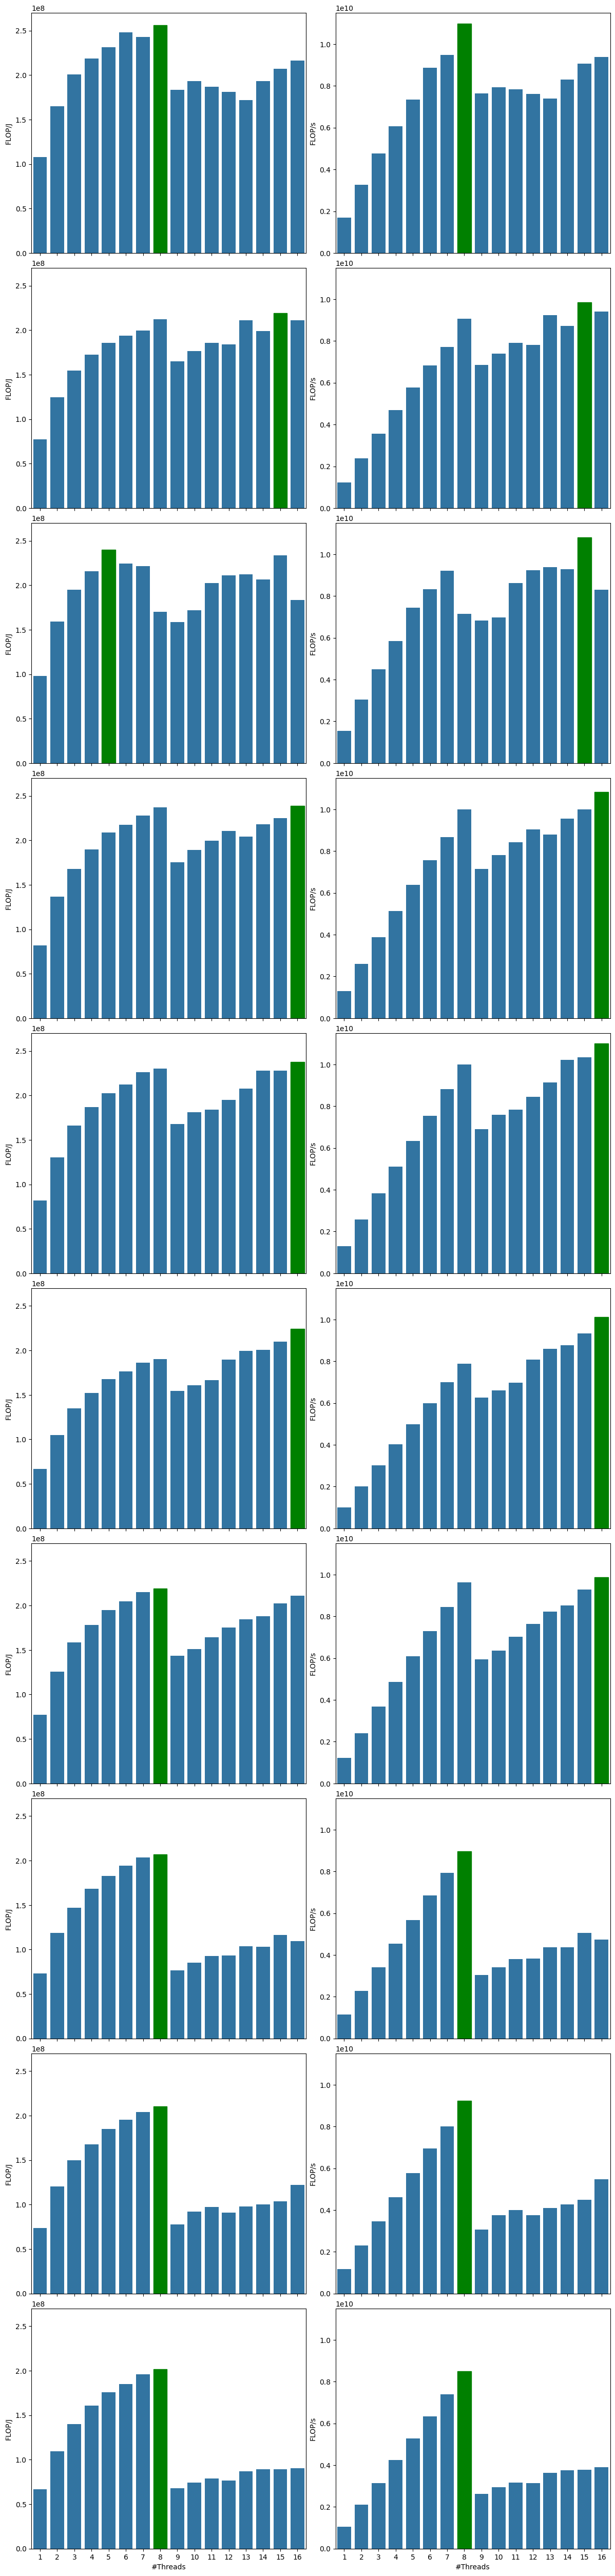

In [125]:
by_size = df.groupby('Size')

fig, axs = plt.subplots(len(by_size), 2, figsize=(12, 5 * len(by_size)), sharex=True)
fig.tight_layout()

for ((size, dfx), (ax_j, ax_s)) in zip(df.groupby('Size'), axs):
    sns.barplot(dfx, x='#Threads', y='FLOP/J', ax=ax_j)
    sns.barplot(dfx, x='#Threads', y='FLOP/s', ax=ax_s)

    ax_j.set_ylim((0, 2.7e8))
    ax_s.set_ylim((0, 1.15e10))
    
    def color_best(ax, col):
        for bar in ax.patches:
            if bar.get_height() == dfx[col].max():
                bar.set_color('g')
                return
    color_best(ax_j, 'FLOP/J')
    color_best(ax_s, 'FLOP/s')

plt.show()